# Emojis distribution per region

In [1]:
using Pkg
Pkg.activate("..")
#=
Pkg.add([
    "Plots", "StatsBase",
    "CSV", "DataFrames",
    "SimilaritySearch", "TextSearch",
    "Formatting", "Latexify"])
Pkg.add([PackageSpec(url="https://github.com/sadit/UMAP.jl")])
=#
using Plots, StatsBase, CSV, DataFrames, LinearAlgebra, TextSearch, Formatting, Latexify,
    SimilaritySearch, SimSearchManifoldLearning

  Activating project at `~/Research/RegionalSpanish`


In [2]:
E = CSV.read("../data/SpanishLang/emojis.tsv.gz", DataFrame, delim='\t')
@info names(E)
cclist = unique(E.country_code)
sort!(cclist)
@info cclist

┌ Info: ["emoji", "country_code", "ndocs"]
└ @ Main In[2]:2
┌ Info: String3[String3("AR"), String3("BO"), String3("BR"), String3("CA"), String3("CL"), String3("CO"), String3("CR"), String3("CU"), String3("DO"), String3("EC"), String3("ES"), String3("FR"), String3("GB"), String3("GQ"), String3("GT"), String3("HN"), String3("MX"), String3("NI"), String3("PA"), String3("PE"), String3("PR"), String3("PY"), String3("SV"), String3("US"), String3("UY"), String3("VE")]
└ @ Main In[2]:5


In [3]:
vocndocs = Dict()
vocweights = Dict()


for g in groupby(E, :country_code)
    D = Dict{String7,Float64}()
    W = Dict{String7,Float64}()
    vocndocs[g.country_code[1]] = D
    vocweights[g.country_code[1]] = W
    for row in eachrow(g)
        D[row.emoji] = row.ndocs 
        W[row.emoji] = 1 - 1 / (1+row.ndocs)
    end
end


# top-20 most popular emojis by region

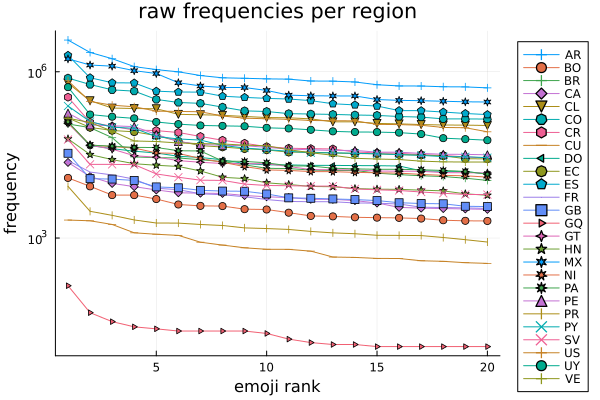

| region |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |  10 |  11 |  12 |  13 |  14 |  15 |  16 |  17 |  18 |  19 |  20 |
| ------:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:|
|     AR |   😂 |   😍 |   ❤ |   😭 |   🎶 |   👌 |   😘 |   👏 |   😒 |   ‍ |   💕 |   😊 |   🏻 |   💔 |   💪 |   🙄 |   🤦 |   🙌 |   😢 |   ♥ |
|     BO |   😂 |   ❤ |   🇧 |   🇴 |   😍 |   🏻 |   😭 |   🇪 |   🇸 |   🤣 |   ‍ |   😊 |   💪 |   🇷 |   😘 |   👏 |   🇦 |   😅 |   🙏 |   📣 |
|     BR |   ❤ |   😂 |   😍 |   🎶 |   🏻 |   😘 |   🙏 |   👏 |   😭 |   ‍ |   🇷 |   ♥ |   🇧 |   🏼 |   💕 |   🤣 |   💙 |   🙄 |   🤔 |   🏽 |
|     CA |   😂 |   🏻 |   ‍ |   ❤ |   😍 |   🏼 |   ♀ |   😭 |   🤔 |   🇨 |   🤣 |   🙄 |   🤷 |   🇦 |   😉 |   😘 |   🙏 |   🤦 |   🏽 |   😊 |
|     CL |   😂 |   🏻 |   ❤ |   😍 |   ‍ |   🤔 |   👏 |   🤣 |   😭 |   🙄 |   😊 |   🏼 |   😘 |   🤦 |   🇨 |   🇱 |   💪 |   👍 |   😉 |   ♂ |
|     CO |   😂 |   😍 |   🎶 |   ❤ |   🏻 |   😭 |   ‍ |   🙏 |   👌 |   🙄 |   🤣 |   🏼 |   ♀ |   🤔 |   💕 |   😔 |   😒 |   🤦 |   👏 |   💔 |
|     CR |   😂 |   ❤ |   😭 |   😍 |   🏻 |   ‍ |   🙄 |   🏼 |   🤔 |   ♀ |   🏽 |   🤦 |   🙌 |   😅 |   😒 |   ♂ |   💔 |   🤷 |   🎶 |   🇷 |
|     CU |   🇺 |   🇨 |   😂 |   🏻 |   ‍ |   🤣 |   ❤ |   😍 |   ♂ |   😘 |   😉 |   🤦 |   ♀ |   🤔 |   🤷 |   👍 |   😅 |   😭 |   🙏 |   👏 |
|     DO |   😂 |   😍 |   ‍ |   🏻 |   🎶 |   🤣 |   ❤ |   😭 |   🤦 |   🏽 |   🙏 |   🤔 |   🙄 |   ♀ |   ♂ |   😩 |   😘 |   🙌 |   🙈 |   🏼 |
|     EC |   😂 |   😍 |   ❤ |   🏻 |   😭 |   ‍ |   🤣 |   🎶 |   🙏 |   🏼 |   👏 |   🤔 |   🇪 |   😊 |   🇨 |   🙄 |   ♀ |   😔 |   💕 |   😘 |
|     ES |   😂 |   😍 |   😘 |   ❤ |   🏻 |   👏 |   😉 |   😭 |   😊 |   💪 |   ‍ |   🏼 |   🤣 |   🤔 |   😅 |   😜 |   🙄 |   👍 |   👌 |   ♀ |
|     FR |   😂 |   😘 |   ❤ |   😍 |   😭 |   🏻 |   💋 |   ‍ |   😉 |   🏼 |   😊 |   🇷 |   👍 |   👏 |   🎶 |   🤔 |   ♀ |   👌 |   🤣 |   💪 |
|     GB |   😂 |   😍 |   ❤ |   🏻 |   ‍ |   😭 |   🏼 |   😉 |   😘 |   🤣 |   😊 |   🤔 |   👏 |   👍 |   🙄 |   ♀ |   😅 |   👌 |   🏽 |   ♂ |
|     GQ |   😂 |   ❤ |   😘 |   😭 |   😍 |   😊 |   🇬 |   👏 |   🇶 |   😀 |   😒 |   🏽 |   🤔 |   🙄 |   ‍ |   🏾 |   😉 |   😎 |   😃 |   😕 |
|     GT |   😂 |   😍 |   ❤ |   🏻 |   😭 |   🤣 |   🎶 |   😊 |   ‍ |   🙄 |   🤔 |   🏼 |   👌 |   😘 |   😅 |   😉 |   💕 |   😒 |   😏 |   😁 |
|     HN |   😂 |   ❤ |   😍 |   😭 |   🏻 |   🤣 |   ‍ |   🎶 |   🙄 |   ♀ |   🤔 |   🇳 |   🇭 |   🏼 |   🤷 |   😅 |   🙏 |   🏽 |   🥺 |   ♂ |
|     MX |   😂 |   ❤ |   😍 |   🏻 |   😭 |   ‍ |   🤔 |   🏼 |   🙄 |   😘 |   🙏 |   ♀ |   🎶 |   💕 |   😊 |   😢 |   👏 |   🙊 |   🤦 |   👌 |
|     NI |   😂 |   ❤ |   😍 |   😭 |   🏻 |   🎶 |   🙄 |   ‍ |   😒 |   🤔 |   💕 |   🤣 |   😅 |   👌 |   💔 |   ♀ |   😏 |   🏼 |   😔 |   😩 |
|     PA |   😂 |   🏻 |   ❤ |   ‍ |   😍 |   🤣 |   😭 |   🤔 |   ♀ |   🙄 |   🏼 |   🤦 |   ♂ |   🎶 |   🇦 |   🇵 |   🤷 |   😩 |   🏽 |   👏 |
|     PE |   😂 |   😍 |   ❤ |   😭 |   🏻 |   🤔 |   😊 |   🙄 |   ‍ |   🎶 |   🇪 |   😘 |   🇵 |   💕 |   🏼 |   🙏 |   😢 |   👏 |   💪 |   🤣 |
|     PR |   😂 |   🙄 |   🏻 |   😭 |   🏼 |   😒 |   ❤ |   😩 |   🤔 |   😍 |   🎶 |   😘 |   🙏 |   🏽 |   💪 |   🙌 |   🔥 |   💖 |   😹 |   🎧 |
|     PY |   😂 |   😍 |   ❤ |   😭 |   🏻 |   🎶 |   🤣 |   ‍ |   🤔 |   🙄 |   💪 |   👌 |   👏 |   💔 |   🙌 |   🏼 |   ♀ |   😢 |   😅 |   😎 |
|     SV |   😂 |   ❤ |   🤣 |   😍 |   😭 |   🏻 |   🎶 |   😊 |   🤔 |   😎 |   😅 |   ‍ |   🙄 |   🙏 |   👏 |   👌 |   😒 |   💕 |   🏼 |   😏 |
|     US |   😂 |   🏻 |   ‍ |   ❤ |   😍 |   😭 |   🏼 |   🙄 |   ♀ |   🏽 |   😘 |   🤣 |   🤔 |   🙏 |   🎶 |   🤦 |   😩 |   🤷 |   ♂ |   🔥 |
|     UY |   😂 |   😍 |   🏻 |   ‍ |   ❤ |   🎶 |   🏼 |   🙌 |   🙄 |   😭 |   ♀ |   🤦 |   😒 |   🤔 |   💪 |   👏 |   👌 |   🏽 |   🙏 |   😘 |
|     VE |   😂 |   😍 |   ❤ |   😭 |   🙏 |   🇪 |   ♥ |   🇻 |   🎶 |   😘 |   💕 |   🏻 |   👏 |   😊 |   🤔 |   👌 |   🙄 |   🤣 |   ✨ |   😏 |


In [4]:
k = 20
display("text/markdown", """# top-$k most popular emojis by region""")
plot()
table = Matrix{String}(undef, length(cclist) + 1, k+1)
header = ["region"]
for i in 1:k
    push!(header, string(i))
end

table[1, :] .= header
for (i, cc) in enumerate(cclist)
    voc = collect(vocndocs[cc])
    sort!(voc, by=p -> p[end], rev=true)
    resize!(voc, k)
    # display("text/markdown", "$cc: " * join(first.(voc), ", "))
    table[i+1, 1] = cc
    table[i+1, 2:end] .= first.(voc)
    plot!(last.(voc), label=cc, m=:auto)
    #display("text/markdown", "    freqs: " * join(format.(Int.(last.(voc)), autoscale=:metric, precision=1), ", "))
end
# display(latexify(table))

plot!(title="raw frequencies per region", yscale=:log10, ylabel="frequency", xlabel="emoji rank", legend=:outertopright, fmt=:png) |> display
display("text/markdown", latexify(table, latex=false, env=:mdtable))

In [5]:
for (cc, voc) in vocweights
    normalize!(voc)
end

n = length(cclist)
A = Matrix{Float64}(undef, n, n)

dist = NormalizedCosineDistance()
@time for (i, cc) in enumerate(cclist)
    u = vocweights[cc]
    A[i, i] = 0.0
    for j in i+1:n
        v = vocweights[cclist[j]]
        A[j, i] = A[i, j] = evaluate(dist, u, v)
    end
end

  0.054011 seconds (28.86 k allocations: 1.455 MiB, 79.69% compilation time)


In [6]:
function creatergb!(C)
    for i in (1, 2, 3)
        v = @view C[i, :]
        # s = 4 * std(v)
        min_, max_ = extrema(v)
        # v .= v ./ s .+ 0.5

        for j in eachindex(v)
            x = (v[j] - min_) / (max_ - min_)
            v[j] = clamp(x,  0, 1)
        end
    end

    [RGB(c...) for c in eachcol(C)]
end

creatergb! (generic function with 1 method)

In [7]:
min_dist = 0.2
k = 4
layout = SpectralLayout()
# metric = :precomputed

model = fit(UMAP, PrecomputedAffinityMatrix(A); maxoutdim=2, k, min_dist, layout)
X = predict(model)
C = creatergb!(predict(fit(model, 3)))

  0.027503 seconds (118.05 k allocations: 5.676 MiB, 99.28% compilation time)


*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 0.109084706
- embedding init: 2.065891561
- embedding opt: 0.001361577



# How emojis are used by Spanish speakers in different regions (Twitter) -- UMAP visualization

2d and 3d projections, for spatial distribution and 3d to color distributions, respectively.
It computes UMAP using 3NN and cosine distance with raw vocabularies/emojis.



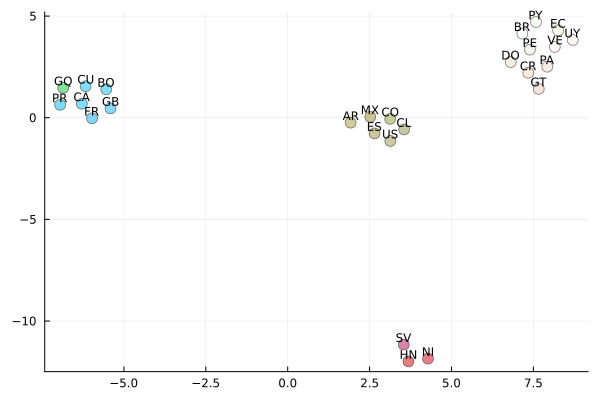

In [8]:
poslist = [:bottom]
scatter(X[1, :], X[2, :], c=C, label="", series_annotations=[text(cc, rand(poslist), 8) for cc in cclist], ms=6, ma=0.5, fa=0.5, la=0.5, alpha=0.5, fmt=:png)
savefig("../figs/fig-emo-umap.pdf")
savefig("../figs/fig-emo-umap.png")
plot!(fmt=:png)